In [5]:
import pandas as pd
import os
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
output_dir = '/Users/athee/UCL/year 3/research project/ COMP0031-Group-Research-Project/ Atheesha-Research'
comments_df = pd.read_csv('comments.csv', low_memory=False)
posts_df = pd.read_csv('posts.csv', low_memory=False) 

In [7]:
import nltk
import pandas as pd
import re
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter

# Download VADER lexicon (only needed once)
nltk.download('vader_lexicon')

# Load the CSV file
df = pd.read_csv('posts.csv')

# Drop rows where 'selftext' is missing or empty
df.dropna(subset=['selftext'], inplace=True)
df = df[df['selftext'].str.strip() != ""]
df = df[df['selftext'].str.strip().str.lower() != "nan"]

# Ensure 'selftext' column is treated as strings
df['selftext'] = df['selftext'].astype(str)

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()


# Text preprocessing function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions (@user)
    text = re.sub(r'#\w+', '', text)  # Remove hashtags (#topic)
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text.strip()

# Apply preprocessing
df['cleaned_text'] = df['selftext'].apply(preprocess_text)

# Function to get compound sentiment score
def get_sentiment(text):
    score = sia.polarity_scores(text)
    return score['compound']

# Apply standard sentiment analysis
df['sentiment_score'] = df['cleaned_text'].apply(get_sentiment)

# Function for weighted sentiment based on word frequency
def get_weighted_sentiment(text):
    words = text.split()
    word_freq = Counter(words)
    sentiment_score = 0
    for word, freq in word_freq.items():
        sentiment_score += sia.polarity_scores(word)['compound'] * freq
    return sentiment_score / max(len(words), 1)  # Normalize

# Apply weighted sentiment scoring
df['weighted_sentiment_score'] = df['cleaned_text'].apply(get_weighted_sentiment)

# Adjusted sentiment classification
def classify_sentiment(score):
    if score >= 0.1:  # Stricter threshold
        return 'Positive'
    elif score <= -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment classification
df['sentiment_label'] = df['weighted_sentiment_score'].apply(classify_sentiment)

# Save results to a new CSV file
df.to_csv('posts_with_custom_sentiment_analysis.csv', index=False)

# Display first few rows to check results
import ace_tools as tools
tools.display_dataframe_to_user(name="Sentiment Analysis Results", dataframe=df)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/athee/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/var/folders/p2/f3gvqmt167l5f9484tvg38cr0000gn/T/ipykernel_76235/3016767391.py:11: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('posts.csv')


ModuleNotFoundError: No module named 'ace_tools'

In [28]:

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Load the CSV file (adjust the filename and path as needed)
df = pd.read_csv('posts.csv')

# Drop rows where 'selftext' is missing (NaN) or empty after stripping whitespace
df.dropna(subset=['selftext'], inplace=True)
df = df[df['selftext'].str.strip() != ""]
df = df[df['selftext'].str.strip().str.lower() != "nan"]

# Ensure that the 'selftext' column is treated as strings
df['selftext'] = df['selftext'].astype(str)

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to get the compound sentiment score for a text
def get_sentiment(text):
    score = sia.polarity_scores(text)
    return score['compound']

# Apply the function to the 'selftext' column
df['sentiment_score'] = df['selftext'].apply(get_sentiment)

# Optional: Classify the sentiment based on the compound score
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['sentiment_score'].apply(classify_sentiment)

# Optionally, save the results to a new CSV file
df.to_csv('posts_with_sentiment_analysis.csv', index=False)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/athee/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/var/folders/p2/f3gvqmt167l5f9484tvg38cr0000gn/T/ipykernel_35018/3451238046.py:5: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('posts.csv')


In [34]:
posts_df = pd.read_csv('posts_with_sentiment_analysis.csv')
total_posts = len(posts_df)
print("Total posts:", total_posts)
count = posts_df['sentiment_label'].value_counts()
print(count)

Total posts: 175987
sentiment_label
Neutral     84215
Positive    70022
Negative    21750
Name: count, dtype: int64


/var/folders/p2/f3gvqmt167l5f9484tvg38cr0000gn/T/ipykernel_35018/4262379965.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  posts_df = pd.read_csv('posts_with_sentiment_analysis.csv')


In [33]:
filtered_comments = comments_df[
    comments_df['body'].str.contains(r'\b(TW|CW)\b', na=False)
]

filtered_comments.to_csv('warning_filtered_comments.csv', index=False)


/var/folders/p2/f3gvqmt167l5f9484tvg38cr0000gn/T/ipykernel_35018/3688660348.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  comments_df['body'].str.contains(r'\b(TW|CW)\b', na=False)


In [36]:
cleaned_with_sentiment_posts_df = pd.read_csv('posts_with_sentiment_analysis.csv')
filtered_posts = cleaned_with_sentiment_posts_df[
    cleaned_with_sentiment_posts_df['selftext'].str.contains(r'\b(TW|CW)\b', na=False)
]
filtered_posts.to_csv('warning_filtered_posts_with_sentiment.csv', index=False)


/var/folders/p2/f3gvqmt167l5f9484tvg38cr0000gn/T/ipykernel_35018/1931703283.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  cleaned_with_sentiment_posts_df = pd.read_csv('posts_with_sentiment_analysis.csv')
/var/folders/p2/f3gvqmt167l5f9484tvg38cr0000gn/T/ipykernel_35018/1931703283.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  cleaned_with_sentiment_posts_df['selftext'].str.contains(r'\b(TW|CW)\b', na=False)


In [121]:

trigger_warning_df = pd.read_csv('warning_filtered_posts_with_sentiment.csv')  # Dataset with TW posts

# Ensure 'selftext' column is treated as string for matching
cleaned_with_sentiment_posts_df['selftext'] = cleaned_with_sentiment_posts_df['selftext'].astype(str)
trigger_warning_df['selftext'] = trigger_warning_df['selftext'].astype(str)

# Remove trigger warning posts from the all posts dataset
non_trigger_posts_df = cleaned_with_sentiment_posts_df[~cleaned_with_sentiment_posts_df['selftext'].isin(trigger_warning_df['selftext'])]

# Save the filtered dataset to a new CSV
non_trigger_posts_df.to_csv('non_trigger_warning_posts.csv', index=False)


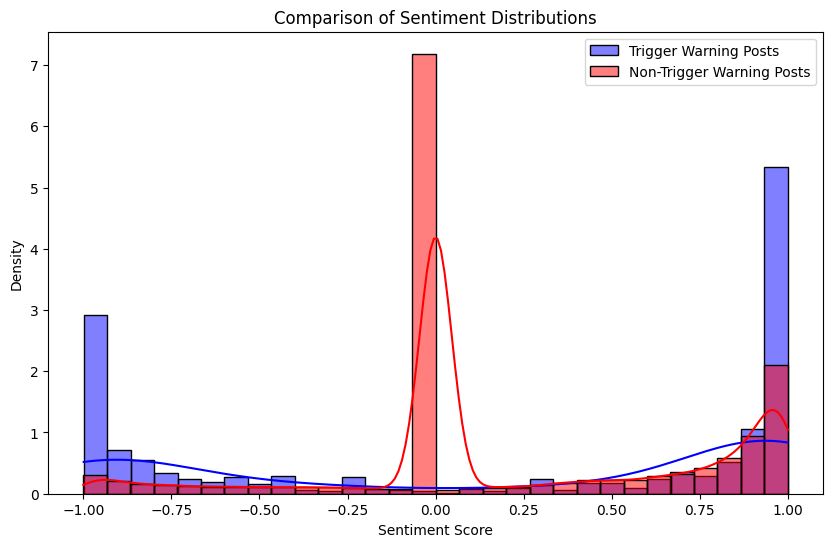

In [122]:
# Create a figure to plot both distributions on the same graph
plt.figure(figsize=(10, 6))

# Plot distribution for the full dataset
sns.histplot(trigger_warning_df ['sentiment_score'], bins=30, kde=True, stat='density', 
             color='blue', alpha=0.5, label='Trigger Warning Posts')

# Plot distribution for the dysphoria dataset
sns.histplot(non_trigger_posts_df['sentiment_score'], bins=30, kde=True, stat='density', 
             color='red', alpha=0.5, label='Non-Trigger Warning Posts')

# Add titles and labels
plt.title("Comparison of Sentiment Distributions")
plt.xlabel("Sentiment Score")
plt.ylabel("Density")
plt.legend()

plt.show()

In [37]:
warning_posts_df = pd.read_csv('warning_filtered_posts_with_sentiment.csv')
total_posts = len(warning_posts_df)
print("Total posts:", total_posts)
count = warning_posts_df['sentiment_label'].value_counts()
print(count)


Total posts: 762
sentiment_label
Positive    445
Negative    314
Neutral       3
Name: count, dtype: int64


In [110]:
filtered_dysphoria_posts = warning_posts_df[ posts_df['selftext'].str.contains(r'\bdysphoria\b', case=False, na=False) ]
filtered_posts.to_csv('dysphoria_posts_from_warning_dataset_with_sentiment.csv', index=False)

/var/folders/p2/f3gvqmt167l5f9484tvg38cr0000gn/T/ipykernel_35018/3276869648.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_dysphoria_posts = warning_posts_df[ posts_df['selftext'].str.contains(r'\bdysphoria\b', case=False, na=False) ]


In [129]:
# Filter for only negative sentiment posts
negative_trigger_warning_df = trigger_warning_df[trigger_warning_df['sentiment_label'] == 'Negative']

# Define filtering keywords
filter_keywords = ["confused", "i don't understand", "question", "unclear", "why", "how", "what" , "?", "when", "where", "which", "who", "i don't know"]

# Function to check if a post contains any filtering words
def contains_keywords(text):
    text_lower = text.lower()
    return any(keyword in text_lower for keyword in filter_keywords)

# Apply filtering
filtered_negative_tw_df = negative_trigger_warning_df [negative_trigger_warning_df ['selftext'].apply(contains_keywords)]

# Save the filtered dataset to a new CSV
filtered_negative_tw_df.to_csv('question_filtered_negative_trigger_warning_posts.csv', index=False)
print(len(filtered_negative_tw_df), "filtered negative trigger warning posts ")
print(len(trigger_warning_df), "trigger warning posts ")


310 filtered negative trigger warning posts 
762 trigger warning posts 


In [ ]:
filtered_posts = cleaned_with_sentiment_posts_df[ posts_df['selftext'].str.contains(r'\bdysphoria\b', case=False, na=False) ]
filtered_posts.to_csv('dysphoria_posts_with_sentiment.csv', index=False)
dysphoria_posts_df = pd.read_csv('dysphoria_posts_with_sentiment.csv')



11597


In [120]:

total_posts = len(dysphoria_posts_df )
print("Total posts:", total_posts)
count = dysphoria_posts_df ['sentiment_label'].value_counts()
print(count)

Total posts: 11597
sentiment_label
Positive    8033
Negative    3402
Neutral      162
Name: count, dtype: int64


In [39]:
dysphoria_posts_df = pd.read_csv('dysphoria_posts_with_sentiment.csv')
subreddit_counts = dysphoria_posts_df['subreddit'].value_counts()
print(subreddit_counts)
#this will print out the number of posts that contain the word dysphoria in each subreddit

subreddit
NonBinary               6698
NonBinaryTalk           2193
genderfluid             1366
agender                 1297
androgyny                 16
GenderNonConforming       14
AskEnbies                  5
NBFashionAdvice            4
NonBinaryOver30            2
ennnnnnnnnnnnbbbbbby       2
Name: count, dtype: int64


In [40]:
subreddit_counts =  cleaned_with_sentiment_posts_df['subreddit'].value_counts()
print(subreddit_counts)

subreddit
NonBinary                 113374
genderfluid                26178
NonBinaryTalk              19231
agender                    12074
ennnnnnnnnnnnbbbbbby        2734
androgyny                   1853
GenderNonConforming          219
NonBinaryOver30              141
NBFashionAdvice              123
AskEnbies                     51
u_That-One-Genderfluid         3
u_Fem-genderfluid              2
u_That-One-Agender             2
u_that-fucky-nonbinary         1
Name: count, dtype: int64


In [41]:
dysphoria_posts_df = pd.read_csv('dysphoria_posts_with_sentiment.csv')
filtered_posts = dysphoria_posts_df[dysphoria_posts_df['edited'] == True]
filtered_posts.to_csv( 'dysphoria_edited_posts_with_sentiment.csv', index=False)

In [42]:
dysphoria_edited_posts_df = pd.read_csv('dysphoria_edited_posts_with_sentiment.csv')
total_posts = len(dysphoria_edited_posts_df)
print("Total posts:", total_posts)
count = dysphoria_edited_posts_df['sentiment_label'].value_counts()
print(count)

Total posts: 1199
sentiment_label
Positive    863
Negative    317
Neutral      19
Name: count, dtype: int64


In [44]:
filtered_posts = dysphoria_posts_df[
    dysphoria_posts_df['selftext'].str.contains('edit', case=False, na=False)
]

filtered_posts.to_csv('dysphoria_with_word_edit_in_posts.csv', index=False)

In [45]:
dysphoria_edited_posts_df = pd.read_csv('dysphoria_with_word_edit_in_posts.csv')
total_posts = len(dysphoria_edited_posts_df)
print("Total posts:", total_posts)
count = dysphoria_edited_posts_df['sentiment_label'].value_counts()
print(count)

#this shows that the only a fraction of the posts that were edited contained the word edit in them. And in most cases, 
# the sentiment of the posts that were edited was positive

Total posts: 437
sentiment_label
Positive    328
Negative    105
Neutral       4
Name: count, dtype: int64


In [47]:
df = pd.read_csv('warning_filtered_posts_with_sentiment.csv')

# Count the number of posts (rows)
num_posts = len(df)
print("Number of posts:", num_posts)

Number of posts: 762


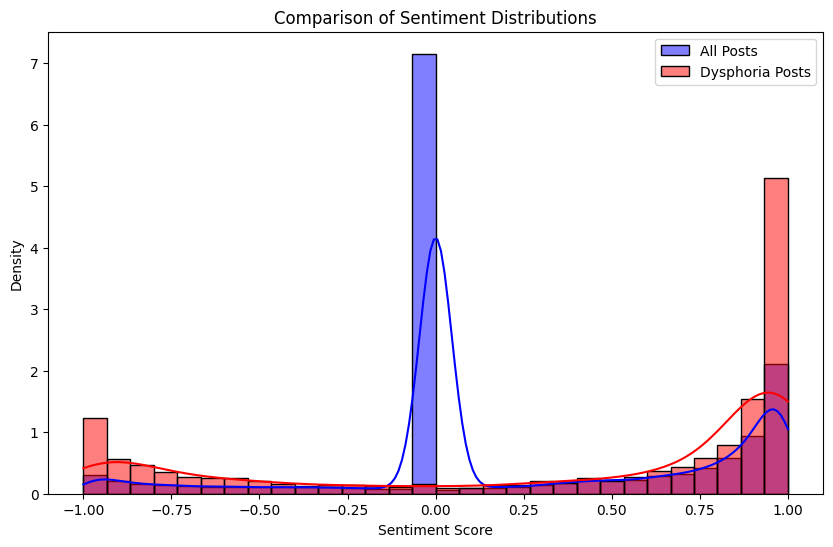

In [48]:


# Create a figure to plot both distributions on the same graph
plt.figure(figsize=(10, 6))

# Plot distribution for the full dataset
sns.histplot(posts_df ['sentiment_score'], bins=30, kde=True, stat='density', 
             color='blue', alpha=0.5, label='All Posts')

# Plot distribution for the dysphoria dataset
sns.histplot(dysphoria_posts_df['sentiment_score'], bins=30, kde=True, stat='density', 
             color='red', alpha=0.5, label='Dysphoria Posts')

# Add titles and labels
plt.title("Comparison of Sentiment Distributions")
plt.xlabel("Sentiment Score")
plt.ylabel("Density")
plt.legend()

plt.show()

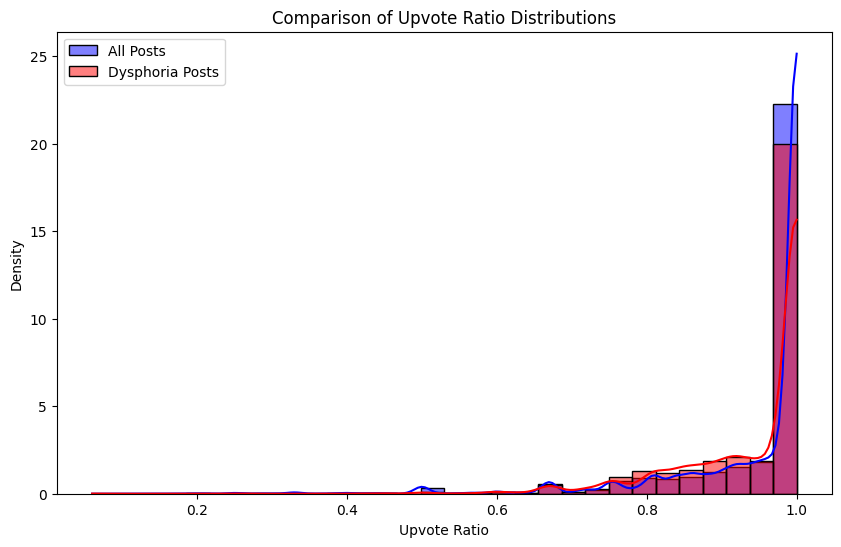

In [49]:


# Create a figure to plot both distributions on the same graph
plt.figure(figsize=(10, 6))

# Plot distribution for the full dataset
sns.histplot(posts_df ['upvote_ratio'], bins=30, kde=True, stat='density', 
             color='blue', alpha=0.5, label='All Posts')

# Plot distribution for the dysphoria dataset
sns.histplot(dysphoria_posts_df['upvote_ratio'], bins=30, kde=True, stat='density', 
             color='red', alpha=0.5, label='Dysphoria Posts')

# Add titles and labels
plt.title("Comparison of Upvote Ratio Distributions")
plt.xlabel("Upvote Ratio")
plt.ylabel("Density")
plt.legend()

plt.show()

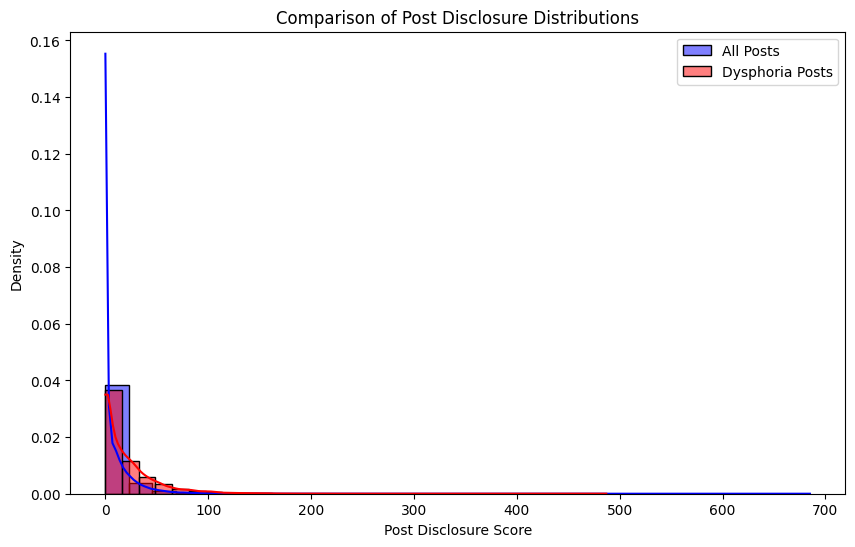

In [50]:
# Create a figure to plot both distributions on the same graph
plt.figure(figsize=(10, 6))

# Plot distribution for the full dataset
sns.histplot(posts_df ['disclosure_post'], bins=30, kde=True, stat='density', 
             color='blue', alpha=0.5, label='All Posts')

# Plot distribution for the dysphoria dataset
sns.histplot(dysphoria_posts_df['disclosure_post'], bins=30, kde=True, stat='density', 
             color='red', alpha=0.5, label='Dysphoria Posts')

# Add titles and labels
plt.title("Comparison of Post Disclosure Distributions")
plt.xlabel("Post Disclosure Score")
plt.ylabel("Density")
plt.legend()

plt.show()

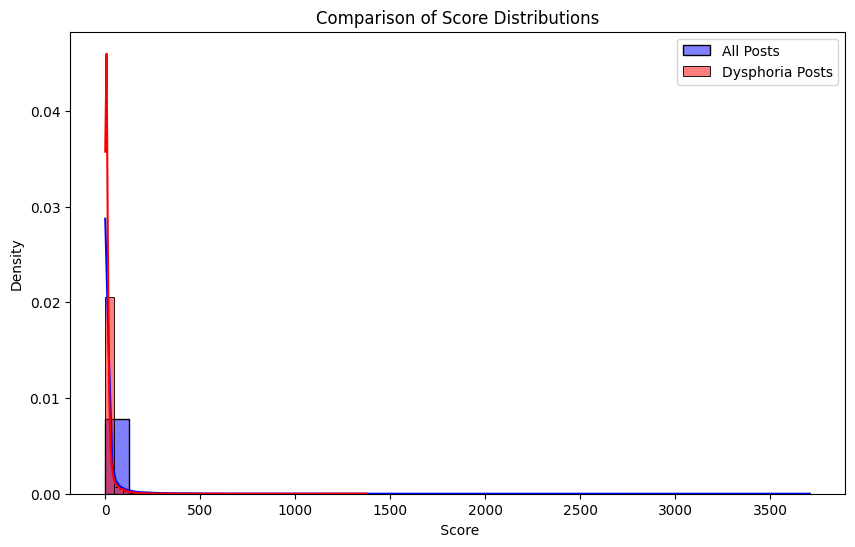

In [51]:
# Create a figure to plot both distributions on the same graph
plt.figure(figsize=(10, 6))

# Plot distribution for the full dataset
sns.histplot(posts_df ['score'], bins=30, kde=True, stat='density', 
             color='blue', alpha=0.5, label='All Posts')

# Plot distribution for the dysphoria dataset
sns.histplot(dysphoria_posts_df['score'], bins=30, kde=True, stat='density', 
             color='red', alpha=0.5, label='Dysphoria Posts')

# Add titles and labels
plt.title("Comparison of Score Distributions")
plt.xlabel(" Score")
plt.ylabel("Density")
plt.legend()

plt.show()

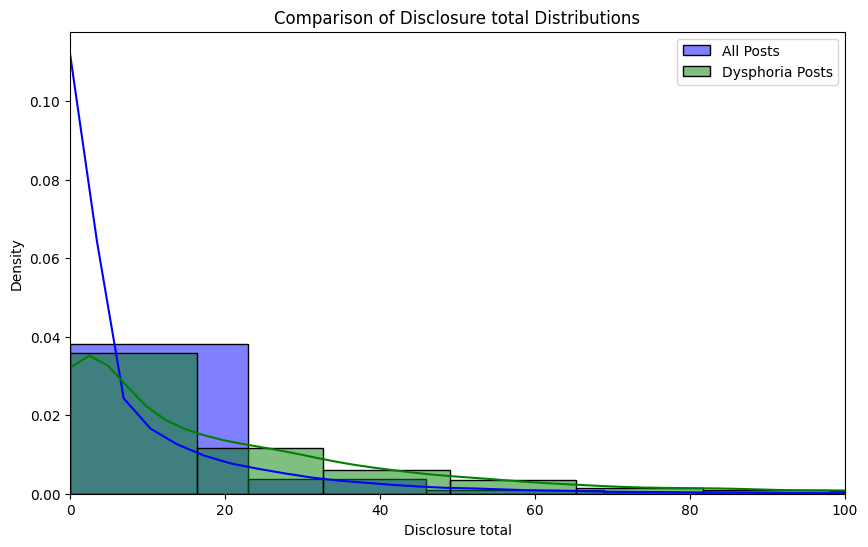

In [52]:
# Create a figure to plot both distributions on the same graph
plt.figure(figsize=(10, 6))

# Plot distribution for the full dataset
sns.histplot(posts_df ['disclosure_total'], bins=30, kde=True, stat='density', 
             color='blue', alpha=0.5, label='All Posts')

# Plot distribution for the dysphoria dataset
sns.histplot(dysphoria_posts_df['disclosure_total'], bins=30, kde=True, stat='density', 
             color='green', alpha=0.5, label='Dysphoria Posts')

# Add titles and labels
plt.title("Comparison of Disclosure total Distributions")
plt.xlabel("Disclosure total")
plt.ylabel("Density")
plt.legend()
plt.xlim(0, 100)

plt.show()

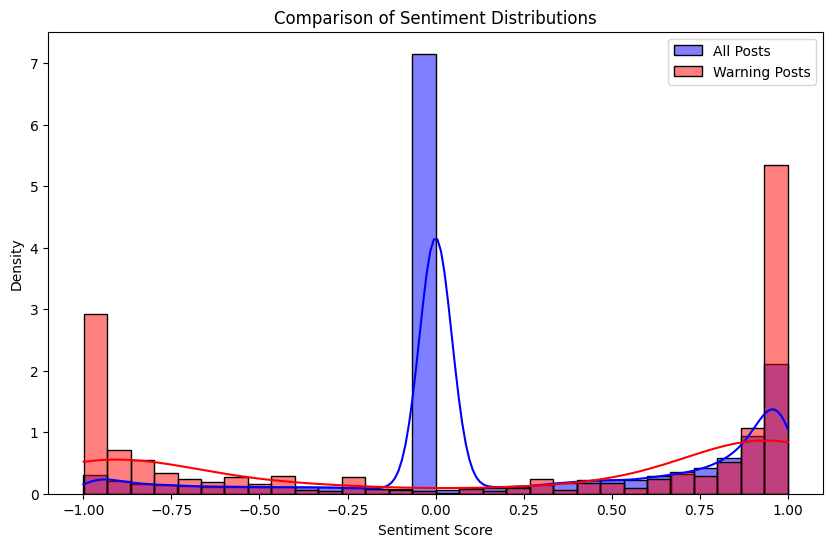

In [53]:
# Create a figure to plot both distributions on the same graph
plt.figure(figsize=(10, 6))

# Plot distribution for the full dataset
sns.histplot(posts_df ['sentiment_score'], bins=30, kde=True, stat='density', 
             color='blue', alpha=0.5, label='All Posts')

# Plot distribution for the dysphoria dataset
sns.histplot(warning_posts_df['sentiment_score'], bins=30, kde=True, stat='density', 
             color='red', alpha=0.5, label='Warning Posts')

# Add titles and labels
plt.title("Comparison of Sentiment Distributions")
plt.xlabel("Sentiment Score")
plt.ylabel("Density")
plt.legend()

plt.show()

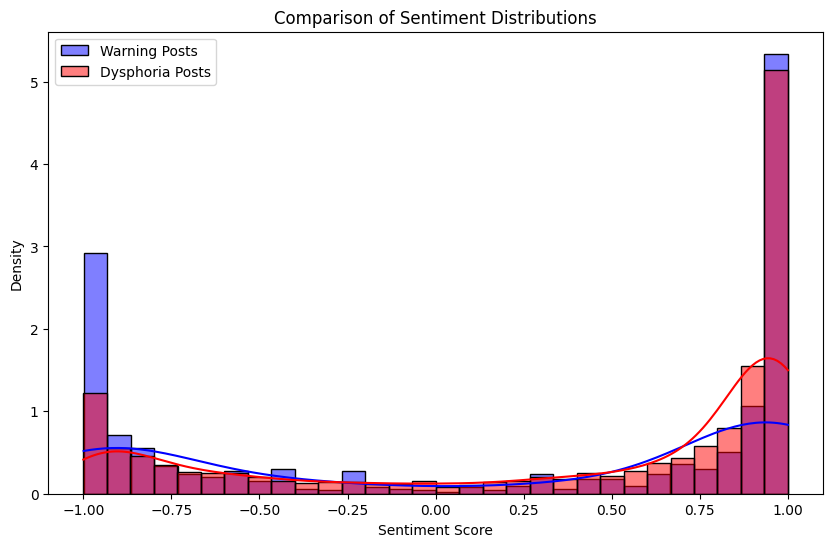

In [ ]:
# Create a figure to plot both distributions on the same graph
plt.figure(figsize=(10, 6))

# Plot distribution for the full dataset
sns.histplot(warning_posts_df['sentiment_score'], bins=30, kde=True, stat='density', 
             color='blue', alpha=0.5, label='Warning Posts')

# Plot distribution for the dysphoria dataset
sns.histplot(dysphoria_posts_df['sentiment_score'], bins=30, kde=True, stat='density', 
             color='red', alpha=0.5, label='Dysphoria Posts')

# Add titles and labels
plt.title("Comparison of Sentiment Distributions")
plt.xlabel("Sentiment Score")
plt.ylabel("Density")
plt.legend()

plt.show()

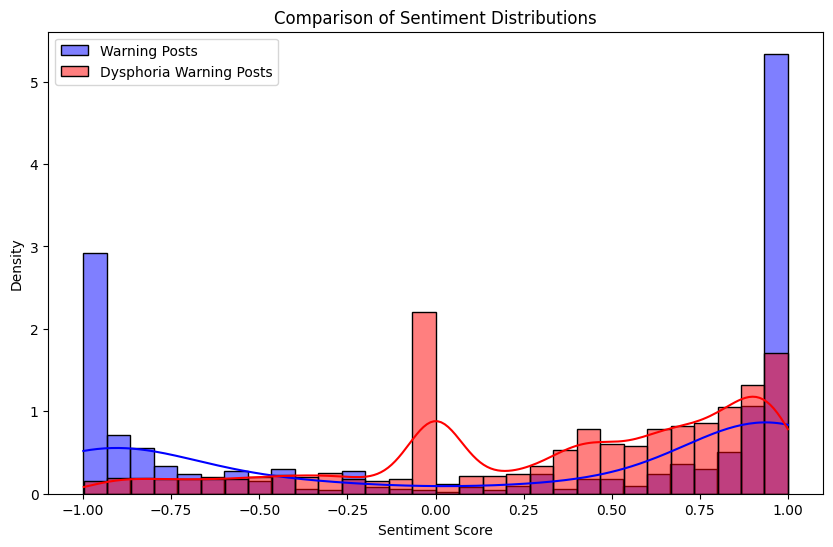

In [115]:
dysphoria_posts_from_warning_dataset_with_sentiment_df = pd.read_csv('dysphoria_posts_from_warning_dataset_with_sentiment.csv')
# Create a figure to plot both distributions on the same graph
plt.figure(figsize=(10, 6))

# Plot distribution for the full dataset
sns.histplot(warning_posts_df['sentiment_score'], bins=30, kde=True, stat='density', 
             color='blue', alpha=0.5, label='Warning Posts')

# Plot distribution for the dysphoria dataset
sns.histplot(dysphoria_posts_from_warning_dataset_with_sentiment_df['sentiment_score'], bins=30, kde=True, stat='density', 
             color='red', alpha=0.5, label='Dysphoria Warning Posts')

# Add titles and labels
plt.title("Comparison of Sentiment Distributions")
plt.xlabel("Sentiment Score")
plt.ylabel("Density")
plt.legend()

plt.show()

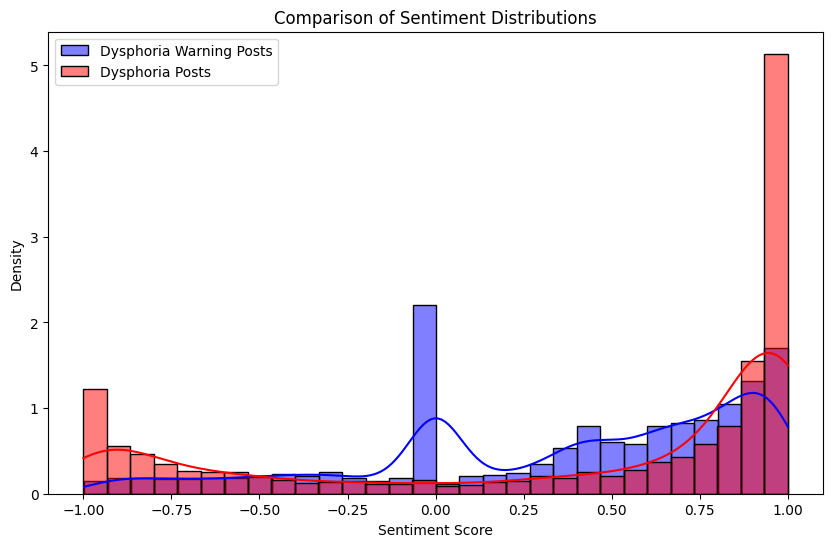

In [113]:

dysphoria_posts_from_warning_dataset_with_sentiment_df = pd.read_csv('dysphoria_posts_from_warning_dataset_with_sentiment.csv')
# Create a figure to plot both distributions on the same graph
plt.figure(figsize=(10, 6))

# Plot distribution for the full dataset
sns.histplot(dysphoria_posts_from_warning_dataset_with_sentiment_df['sentiment_score'], bins=30, kde=True, stat='density', 
             color='blue', alpha=0.5, label='Dysphoria Warning Posts')

# Plot distribution for the dysphoria dataset
sns.histplot(dysphoria_posts_df['sentiment_score'], bins=30, kde=True, stat='density', 
             color='red', alpha=0.5, label='Dysphoria Posts')

# Add titles and labels
plt.title("Comparison of Sentiment Distributions")
plt.xlabel("Sentiment Score")
plt.ylabel("Density")
plt.legend()

plt.show()

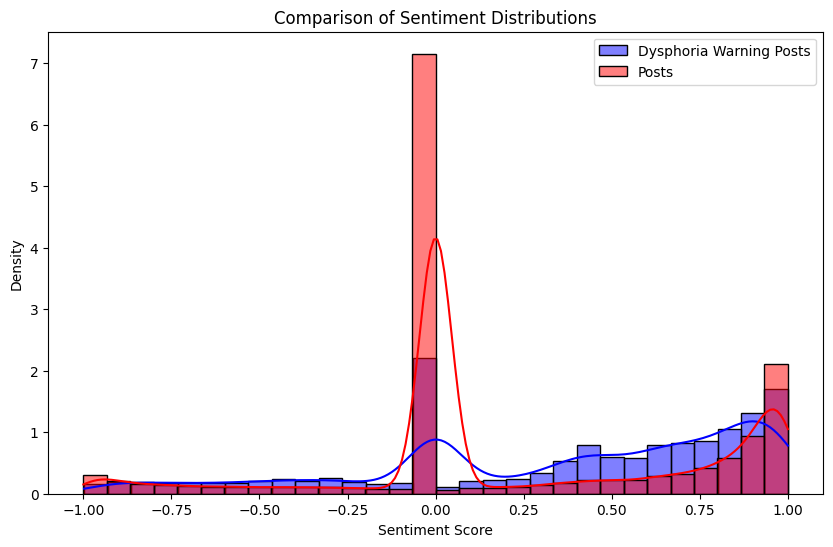

In [114]:

dysphoria_posts_from_warning_dataset_with_sentiment_df = pd.read_csv('dysphoria_posts_from_warning_dataset_with_sentiment.csv')
# Create a figure to plot both distributions on the same graph
plt.figure(figsize=(10, 6))

# Plot distribution for the full dataset
sns.histplot(dysphoria_posts_from_warning_dataset_with_sentiment_df['sentiment_score'], bins=30, kde=True, stat='density', 
             color='blue', alpha=0.5, label='Dysphoria Warning Posts')

# Plot distribution for the dysphoria dataset
sns.histplot(posts_df['sentiment_score'], bins=30, kde=True, stat='density', 
             color='red', alpha=0.5, label='Posts')

# Add titles and labels
plt.title("Comparison of Sentiment Distributions")
plt.xlabel("Sentiment Score")
plt.ylabel("Density")
plt.legend()

plt.show()

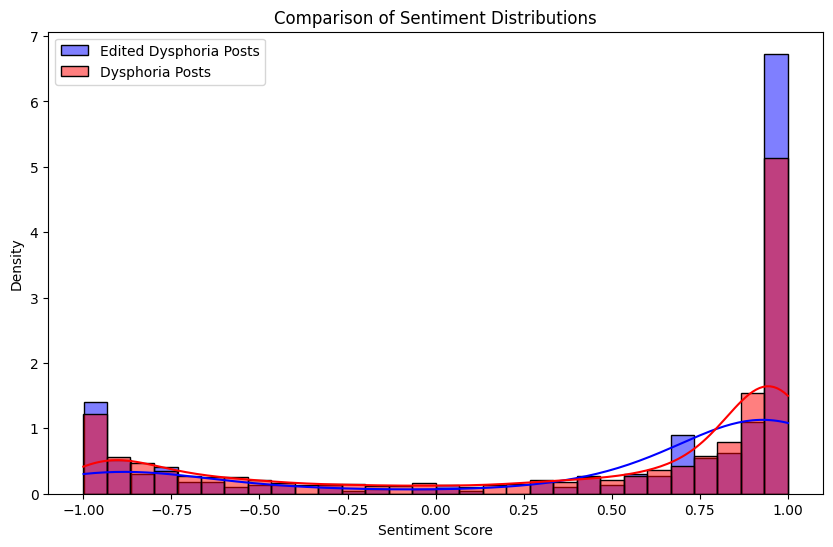

In [55]:



plt.figure(figsize=(10, 6))

# Plot distribution for the full dataset
sns.histplot(dysphoria_edited_posts_df['sentiment_score'], bins=30, kde=True, stat='density', 
             color='blue', alpha=0.5, label='Edited Dysphoria Posts')

# Plot distribution for the dysphoria dataset
sns.histplot(dysphoria_posts_df['sentiment_score'], bins=30, kde=True, stat='density', 
             color='red', alpha=0.5, label='Dysphoria Posts')

# Add titles and labels
plt.title("Comparison of Sentiment Distributions")
plt.xlabel("Sentiment Score")
plt.ylabel("Density")
plt.legend()

plt.show()

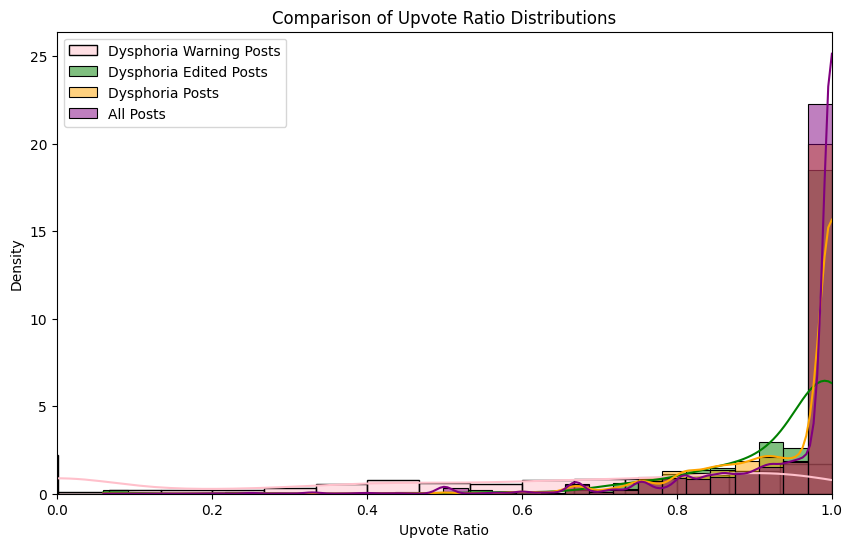

In [118]:
# Create a figure to plot both distributions on the same graph
plt.figure(figsize=(10, 6))

dysphoria_posts_from_warning_dataset_with_sentiment_df = pd.read_csv('dysphoria_posts_from_warning_dataset_with_sentiment.csv')

# Plot distribution for the full dataset
sns.histplot(dysphoria_posts_from_warning_dataset_with_sentiment_df['sentiment_score'], bins=30, kde=True, stat='density', 
             color='pink', alpha=0.5, label='Dysphoria Warning Posts')
# Plot distribution for the full dataset
sns.histplot(dysphoria_edited_posts_df ['upvote_ratio'], bins=30, kde=True, stat='density', 
             color='green', alpha=0.5, label='Dysphoria Edited Posts')

# Plot distribution for the dysphoria dataset
sns.histplot(dysphoria_posts_df['upvote_ratio'], bins=30, kde=True, stat='density', 
             color='orange', alpha=0.5, label='Dysphoria Posts')

sns.histplot(posts_df['upvote_ratio'], bins=30, kde=True, stat='density', 
             color='purple', alpha=0.5, label='All Posts')



# Add titles and labels
plt.title("Comparison of Upvote Ratio Distributions")
plt.xlabel("Upvote Ratio")
plt.ylabel("Density")
plt.legend()
plt.xlim(0, 1)

plt.show()

In [56]:

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Load the CSV file (adjust the filename and path as needed)
df = pd.read_csv('comments.csv')

# Drop rows where 'selftext' is missing (NaN) or empty after stripping whitespace
df.dropna(subset=['body'], inplace=True)
df = df[df['body'].str.strip() != ""]
df = df[df['body'].str.strip().str.lower() != "nan"]

# Ensure that the 'selftext' column is treated as strings
df['body'] = df['body'].astype(str)

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to get the compound sentiment score for a text
def get_sentiment(text):
    score = sia.polarity_scores(text)
    return score['compound']

# Apply the function to the 'selftext' column
df['sentiment_score'] = df['body'].apply(get_sentiment)

# Optional: Classify the sentiment based on the compound score
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['sentiment_score'].apply(classify_sentiment)

# Optionally, save the results to a new CSV file
df.to_csv('comments_with_sentiment_analysis.csv', index=False)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/athee/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/var/folders/p2/f3gvqmt167l5f9484tvg38cr0000gn/T/ipykernel_35018/3501851795.py:5: DtypeWarning: Columns (2,5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('comments.csv')


In [79]:
cleaned_with_sentiment_comments_df = pd.read_csv('comments_with_sentiment_analysis.csv')
filtered_posts = cleaned_with_sentiment_comments_df[ comments_df['body'].str.contains(r'\bdysphoria\b', case=False, na=False) ]
filtered_posts.to_csv('dysphoria_comments_with_sentiment.csv', index=False)

/var/folders/p2/f3gvqmt167l5f9484tvg38cr0000gn/T/ipykernel_35018/4198933979.py:1: DtypeWarning: Columns (2,5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  cleaned_with_sentiment_comments_df = pd.read_csv('comments_with_sentiment_analysis.csv')
/var/folders/p2/f3gvqmt167l5f9484tvg38cr0000gn/T/ipykernel_35018/4198933979.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_posts = cleaned_with_sentiment_comments_df[ comments_df['body'].str.contains(r'\bdysphoria\b', case=False, na=False) ]


In [88]:
posts = pd.read_csv("posts_with_sentiment_analysis.csv")
comments = pd.read_csv("comments_with_sentiment_analysis.csv")
sampled_posts = posts.sample(n=10, random_state=42)
print(sampled_posts['submission_id'].head())
print(comments['link_id'].head())

/var/folders/p2/f3gvqmt167l5f9484tvg38cr0000gn/T/ipykernel_35018/1056443651.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  posts = pd.read_csv("posts_with_sentiment_analysis.csv")
/var/folders/p2/f3gvqmt167l5f9484tvg38cr0000gn/T/ipykernel_35018/1056443651.py:2: DtypeWarning: Columns (2,5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  comments = pd.read_csv("comments_with_sentiment_analysis.csv")


129870    t3ov4y
3918      rnr6u9
91223     nij3v7
148070    dz3hyy
35982     wtlagb
Name: submission_id, dtype: object
0    t3_13m8nxx
1    t3_13m8nxx
2    t3_13m8nxx
3    t3_13m8nxx
4    t3_13m8nxx
Name: link_id, dtype: object


/var/folders/p2/f3gvqmt167l5f9484tvg38cr0000gn/T/ipykernel_35018/2920218752.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  posts = pd.read_csv("posts_with_sentiment_analysis.csv")
/var/folders/p2/f3gvqmt167l5f9484tvg38cr0000gn/T/ipykernel_35018/2920218752.py:3: DtypeWarning: Columns (2,5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  comments = pd.read_csv("comments_with_sentiment_analysis.csv")


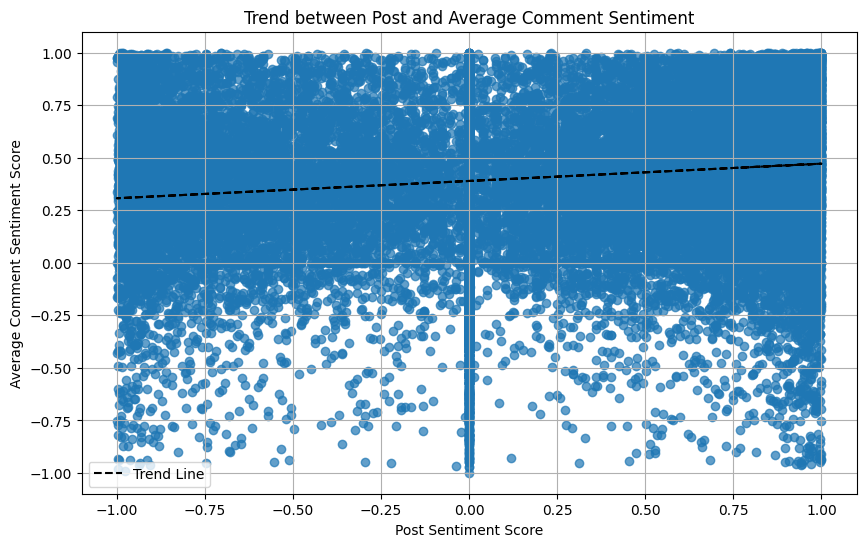

In [90]:


# Load CSV files
posts = pd.read_csv("posts_with_sentiment_analysis.csv")
comments = pd.read_csv("comments_with_sentiment_analysis.csv")

# Clean the comments' link_id if it has a prefix like "t3_"
comments['link_id'] = comments['link_id'].str.replace('t3_', '', regex=False)

# Merge posts with comments on submission_id and link_id
merged = posts.merge(
    comments, 
    left_on='submission_id', 
    right_on='link_id', 
    how='left', 
    suffixes=('_post', '_comment')
)

# Group by the post (using submission_id) and aggregate the comments into lists
grouped = merged.groupby('submission_id').agg({
    'created_utc_post': 'first',      # Post's creation time
    'selftext': 'first',              # Post text
    'upvote_ratio': 'first',          # Post upvote ratio
    'body': list,                     # All comments' text for the post
    'sentiment_score_comment': list,  # All individual comment sentiment scores
    'sentiment_score_post': 'first'   # Post's sentiment score
}).reset_index()

# Define a helper function to safely compute the mean
def safe_nanmean(scores):
    arr = np.array(scores)
    # Filter out NaN values
    valid_scores = arr[~np.isnan(arr)]
    if valid_scores.size > 0:
        return np.mean(valid_scores)
    else:
        return np.nan

# Replace the lambda with the safe_nanmean function
grouped['avg_comment_sentiment'] = grouped['sentiment_score_comment'].apply(safe_nanmean)

# Write the grouped dysphoria posts and their comments to a CSV file
grouped.to_csv("grouped_data.csv", index=False)

# Drop rows with missing values in the relevant columns for plotting
plot_data = grouped.dropna(subset=['sentiment_score_post', 'avg_comment_sentiment'])

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(plot_data['sentiment_score_post'], plot_data['avg_comment_sentiment'], alpha=0.7)

# Compute the regression line using numpy's polyfit
x = plot_data['sentiment_score_post']
y = plot_data['avg_comment_sentiment']
slope, intercept = np.polyfit(x, y, 1)
plt.plot(x, slope * x + intercept, linestyle='--', color='black', label='Trend Line')

plt.xlabel("Post Sentiment Score")
plt.ylabel("Average Comment Sentiment Score")
plt.title("Trend between Post and Average Comment Sentiment")
plt.legend()
plt.grid(True)
plt.show()




/var/folders/p2/f3gvqmt167l5f9484tvg38cr0000gn/T/ipykernel_35018/2853955462.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


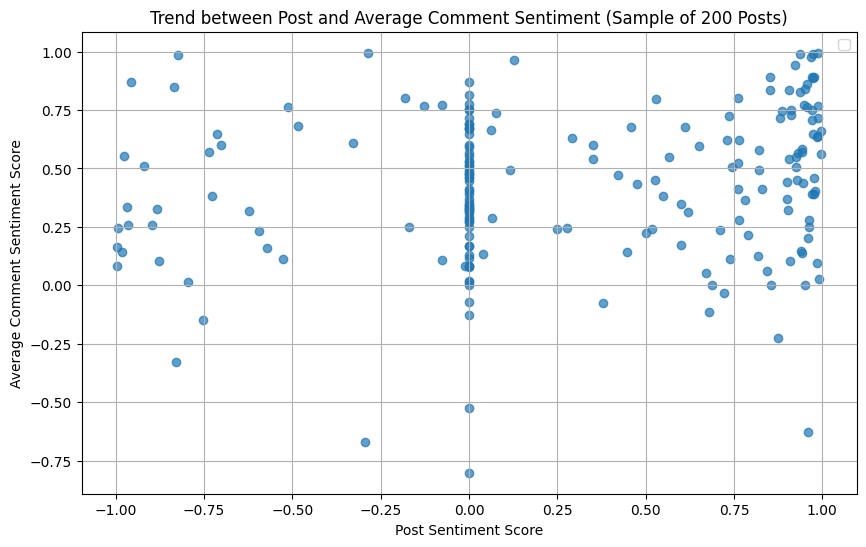

In [76]:

# Randomly sample 200 posts for plotting (if available)
if len(plot_data) >= 200:
    plot_data = plot_data.sample(n=200, random_state=42)
else:
    print("Less than 200 posts available after dropping NA. Plotting all available posts.")

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(plot_data['sentiment_score_post'], plot_data['avg_comment_sentiment'], alpha=0.7)

# Compute and plot the regression trend line
x = plot_data['sentiment_score_post']
y = plot_data['avg_comment_sentiment']


plt.xlabel("Post Sentiment Score")
plt.ylabel("Average Comment Sentiment Score")
plt.title("Trend between Post and Average Comment Sentiment (Sample of 200 Posts)")
plt.legend()
plt.grid(True)
plt.show()


/var/folders/p2/f3gvqmt167l5f9484tvg38cr0000gn/T/ipykernel_35018/1670764835.py:3: DtypeWarning: Columns (2,5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  comments = pd.read_csv("comments_with_sentiment_analysis.csv")


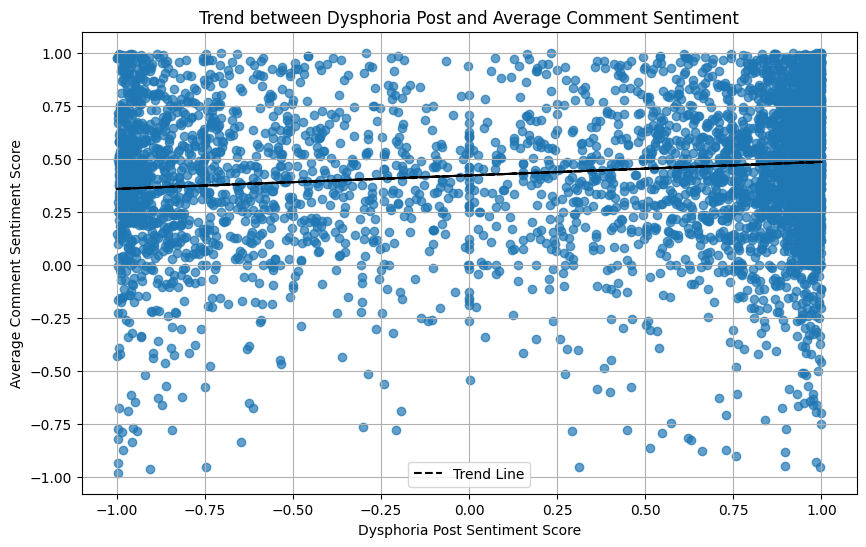

In [95]:


# Load CSV files
posts = pd.read_csv("dysphoria_posts_with_sentiment.csv")
comments = pd.read_csv("comments_with_sentiment_analysis.csv")

# Clean the comments' link_id if it has a prefix like "t3_"
comments['link_id'] = comments['link_id'].str.replace('t3_', '', regex=False)

# Merge posts with comments on submission_id and link_id
merged = posts.merge(
    comments, 
    left_on='submission_id', 
    right_on='link_id', 
    how='left', 
    suffixes=('_post', '_comment')
)

# Group by the post (using submission_id) and aggregate the comments into lists
grouped_dis = merged.groupby('submission_id').agg({
    'created_utc_post': 'first',      # Post's creation time
    'selftext': 'first',              # Post text
    'upvote_ratio': 'first',          # Post upvote ratio
    'body': list,                     # All comments' text for the post
    'sentiment_score_comment': list,  # All individual comment sentiment scores
    'sentiment_score_post': 'first'   # Post's sentiment score
}).reset_index()

# Define a helper function to safely compute the mean
def safe_nanmean(scores):
    arr = np.array(scores)
    # Filter out NaN values
    valid_scores = arr[~np.isnan(arr)]
    if valid_scores.size > 0:
        return np.mean(valid_scores)
    else:
        return np.nan

# Replace the lambda with the safe_nanmean function
grouped_dis['avg_comment_sentiment'] = grouped_dis['sentiment_score_comment'].apply(safe_nanmean)

# Write the grouped dysphoria posts and their comments to a CSV file
grouped_dis.to_csv("grouped_dysphoria_data.csv", index=False)

# Drop rows with missing values in the relevant columns for plotting
plot_data = grouped_dis.dropna(subset=['sentiment_score_post', 'avg_comment_sentiment'])

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(plot_data['sentiment_score_post'], plot_data['avg_comment_sentiment'], alpha=0.7)

# Compute the regression line using numpy's polyfit
x = plot_data['sentiment_score_post']
y = plot_data['avg_comment_sentiment']
slope, intercept = np.polyfit(x, y, 1)
plt.plot(x, slope * x + intercept, linestyle='--', color='black', label='Trend Line')

plt.xlabel("Dysphoria Post Sentiment Score")
plt.ylabel("Average Comment Sentiment Score")
plt.title("Trend between Dysphoria Post and Average Comment Sentiment")
plt.legend()
plt.grid(True)
plt.show()


/var/folders/p2/f3gvqmt167l5f9484tvg38cr0000gn/T/ipykernel_35018/149252972.py:2: DtypeWarning: Columns (2,5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  comments = pd.read_csv("comments_with_sentiment_analysis.csv")


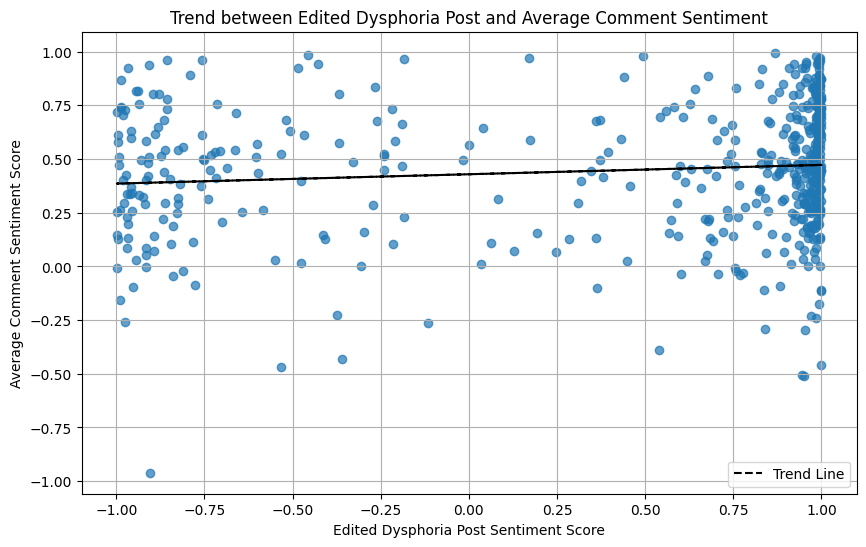

In [96]:
posts = pd.read_csv("dysphoria_edited_posts_with_sentiment.csv")
comments = pd.read_csv("comments_with_sentiment_analysis.csv")

# Clean the comments' link_id if it has a prefix like "t3_"
comments['link_id'] = comments['link_id'].str.replace('t3_', '', regex=False)

# Merge posts with comments on submission_id and link_id
merged = posts.merge(
    comments, 
    left_on='submission_id', 
    right_on='link_id', 
    how='left', 
    suffixes=('_post', '_comment')
)

# Group by the post (using submission_id) and aggregate the comments into lists
grouped_dis = merged.groupby('submission_id').agg({
    'created_utc_post': 'first',      # Post's creation time
    'selftext': 'first',              # Post text
    'upvote_ratio': 'first',          # Post upvote ratio
    'body': list,                     # All comments' text for the post
    'sentiment_score_comment': list,  # All individual comment sentiment scores
    'sentiment_score_post': 'first'   # Post's sentiment score
}).reset_index()

# Define a helper function to safely compute the mean
def safe_nanmean(scores):
    arr = np.array(scores)
    # Filter out NaN values
    valid_scores = arr[~np.isnan(arr)]
    if valid_scores.size > 0:
        return np.mean(valid_scores)
    else:
        return np.nan

# Replace the lambda with the safe_nanmean function
grouped_dis['avg_comment_sentiment'] = grouped_dis['sentiment_score_comment'].apply(safe_nanmean)

# Write the grouped dysphoria posts and their comments to a CSV file
grouped_dis.to_csv("grouped_dysphoria_data.csv", index=False)

# Drop rows with missing values in the relevant columns for plotting
plot_data = grouped_dis.dropna(subset=['sentiment_score_post', 'avg_comment_sentiment'])

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(plot_data['sentiment_score_post'], plot_data['avg_comment_sentiment'], alpha=0.7)

# Compute the regression line using numpy's polyfit
x = plot_data['sentiment_score_post']
y = plot_data['avg_comment_sentiment']
slope, intercept = np.polyfit(x, y, 1)
plt.plot(x, slope * x + intercept, linestyle='--', color='black', label='Trend Line')

plt.xlabel("Edited Dysphoria Post Sentiment Score")
plt.ylabel("Average Comment Sentiment Score")
plt.title("Trend between Edited Dysphoria Post and Average Comment Sentiment")
plt.legend()
plt.grid(True)
plt.show()

In [98]:
# Load the CSV file
df = pd.read_csv('warning_filtered_posts_with_sentiment.csv')

# Define the word you want to search for
word = "trauma"

# Count posts that contain the word (case-insensitive)
count = df['selftext'].str.contains(word, case=False, na=False).sum()

print(f"The word '{word}' appears in {count} posts.")

The word 'trauma' appears in 62 posts.


In [99]:
# Load the CSV file
df = pd.read_csv('warning_filtered_posts_with_sentiment.csv')

# Define the word you want to search for
word = "eating disorder"

# Count posts that contain the word (case-insensitive)
count = df['selftext'].str.contains(word, case=False, na=False).sum()

print(f"The word '{word}' appears in {count} posts.")

The word 'eating disorder' appears in 39 posts.


In [ ]:

df = pd.read_csv('warning_filtered_posts_with_sentiment.csv')


word = "dysphoria"


count = df['selftext'].str.contains(word, case=False, na=False).sum()

print(f"The word '{word}' appears in {count} posts.")

The word 'dysphoria' appears in 307 posts.


In [ ]:

df = pd.read_csv('warning_filtered_posts_with_sentiment.csv')


word = "menstruation"


count = df['selftext'].str.contains(word, case=False, na=False).sum()

print(f"The word '{word}' appears in {count} posts.")

The word 'menstruation' appears in 13 posts.


In [ ]:

df = pd.read_csv('warning_filtered_posts_with_sentiment.csv')


word = "death"

count = df['selftext'].str.contains(word, case=False, na=False).sum()

print(f"The word '{word}' appears in {count} posts.")

The word 'death' appears in 17 posts.


In [ ]:

df = pd.read_csv('warning_filtered_posts_with_sentiment.csv')


word = "dead naming"


count = df['selftext'].str.contains(word, case=False, na=False).sum()

print(f"The word '{word}' appears in {count} posts.")

The word 'dead naming' appears in 1 posts.


In [ ]:

df = pd.read_csv('warning_filtered_posts_with_sentiment.csv')


word = "transphobia"


count = df['selftext'].str.contains(word, case=False, na=False).sum()

print(f"The word '{word}' appears in {count} posts.")

The word 'transphobia' appears in 137 posts.


In [ ]:

df = pd.read_csv('warning_filtered_posts_with_sentiment.csv')


word = "homophobia"


count = df['selftext'].str.contains(word, case=False, na=False).sum()

print(f"The word '{word}' appears in {count} posts.")

The word 'homophobia' appears in 31 posts.


In [ ]:

df = pd.read_csv('warning_filtered_posts_with_sentiment.csv')


word = "misgendering"


count = df['selftext'].str.contains(word, case=False, na=False).sum()

print(f"The word '{word}' appears in {count} posts.")

The word 'misgendering' appears in 44 posts.


In [ ]:
df = pd.read_csv('warning_filtered_posts_with_sentiment.csv')


num_posts = len(df)
print(num_posts)

762


In [13]:
df  = pd.read_csv('posts_with_sentiment_analysis.csv')
num_posts = len(df)
upvote_ratio = df['upvote_ratio'].mean()
print("Average upvote ratio:", upvote_ratio)
upvote_ratio = df['upvote_ratio'].std()
print("Standard deviation of upvote ratio:", upvote_ratio)
upvote_ratio = df['upvote_ratio'].min()
print("Minimum upvote ratio:", upvote_ratio)
upvote_ratio = df['upvote_ratio'].max()
print("Maximum upvote ratio:", upvote_ratio)
upvote_ratio = df['upvote_ratio'].median()
print("Median upvote ratio:", upvote_ratio)

Average upvote ratio: 0.9462063424415397
Standard deviation of upvote ratio: 0.1093592799886129
Minimum upvote ratio: 0.06
Maximum upvote ratio: 1.0
Median upvote ratio: 1.0


/var/folders/p2/f3gvqmt167l5f9484tvg38cr0000gn/T/ipykernel_76235/2500617465.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df  = pd.read_csv('posts_with_sentiment_analysis.csv')


In [12]:
df =pd.read_csv('warning_filtered_posts_with_sentiment.csv')
num_posts = len(df)
print(num_posts)
upvote_ratio = df['upvote_ratio'].mean()
print("Average upvote ratio:", upvote_ratio)
upvote_ratio = df['upvote_ratio'].std()
print("Standard deviation of upvote ratio:", upvote_ratio)
upvote_ratio = df['upvote_ratio'].min()
print("Minimum upvote ratio:", upvote_ratio)
upvote_ratio = df['upvote_ratio'].max()
print("Maximum upvote ratio:", upvote_ratio)
upvote_ratio = df['upvote_ratio'].median()
print("Median upvote ratio:", upvote_ratio)



762
Average upvote ratio: 0.9459324522760645
Standard deviation of upvote ratio: 0.09336072430288794
Minimum upvote ratio: 0.33
Maximum upvote ratio: 1.0
Median upvote ratio: 1.0
